In [10]:
!pip install scipy

In [11]:
!pip install researchpy

In [13]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.preprocessing import scale
import researchpy as rp
from scipy import stats

In [14]:
bike_sharing_data = pd.read_csv('C:/Users/Rukmani/Downloads/day.csv')

In [15]:
bike_sharing_data.shape

(731, 16)

In [16]:
bike_sharing_data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [20]:
bike_sharing_data = bike_sharing_data[['season','mnth','holiday','workingday','weathersit','temp','cnt']]

In [29]:
bike_sharing_data.to_csv ('C:/Users/Rukmani/Downloads/processed_day.csv', index=False)

In [30]:
bike_sharing_data.head()

,season,mnth,holiday,workingday,weathersit,temp,cnt
0,1,1,0,0,2,0.344167,985
1,1,1,0,0,2,0.363478,801
2,1,1,0,1,1,0.196364,1349
3,1,1,0,1,1,0.200000,1562
4,1,1,0,1,1,0.226957,1600


In [32]:
bike_sharing_data['season'].unique() # 1= spring, 2=summer 3=fall, 4= winter; categorical columns

array([1, 2, 3, 4], dtype=int64)

In [33]:
bike_sharing_data['workingday'].unique() # 0= no working day 1=working day, categorical columns

array([0, 1], dtype=int64)

In [34]:
bike_sharing_data['holiday'].unique() # 0= no holiday 1=holiday, categorical columns

array([0, 1], dtype=int64)

In [35]:
bike_sharing_data['weathersit'].unique() # 1=clear,fewclouds, 2=misty,cloudy ; 3=light snow,rain,thunderstorm categorical columns

array([2, 1, 3], dtype=int64)

In [40]:
bike_sharing_data['temp'].describe() #numerical values

count    731.000000
mean       0.495385
std        0.183051
min        0.059130
25%        0.337083
50%        0.498333
75%        0.655417
max        0.861667
Name: temp, dtype: float64

In [42]:
bike_sharing_data.shape

(731, 7)

In [45]:
bike_sharing_data.groupby('workingday')['cnt'].describe()
#The output of this code will be a DataFrame containing the descriptive statistics for the "cnt" column, 
#grouped by the "workingday" column. For example, if the "workingday" column 
#contains two unique values (0 and 1), then the output might look like:

,count,mean,std,min,25%,50%,75%,max
workingday,,,,,,,,
0,231.0,4330.168831,2052.141245,605.0,2710.50,4459.0,5907.5,8714.0
1,500.0,4584.820000,1878.415583,22.0,3344.25,4582.0,5987.5,8362.0


<AxesSubplot:title={'center':'cnt'}, xlabel='workingday'>

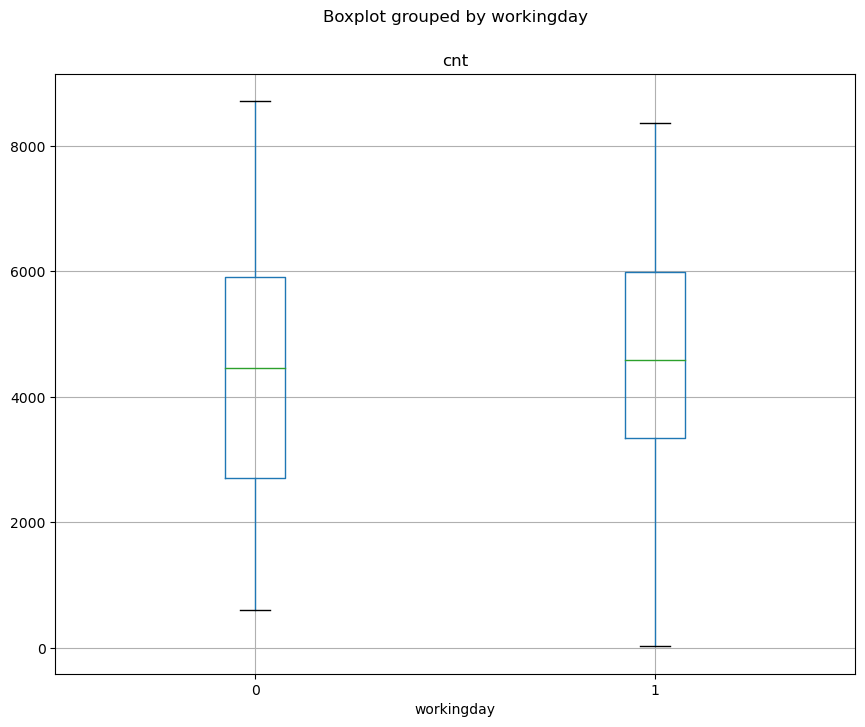

In [46]:
#is the difference in mean significant, going to use t-test to find out
#lets visualise using a box plot
bike_sharing_data.boxplot(column= ['cnt'], by='workingday', figsize= (10,8))

In [47]:
sample_01= bike_sharing_data[(bike_sharing_data['workingday']==1)]
sample_02= bike_sharing_data[(bike_sharing_data['workingday']==0)]

In [51]:
sample_01.shape, sample_02.shape

((500, 7), (231, 7))

In [52]:
#for paired t-test we need the sample size to be the same
sample_01= sample_01.sample(231) #The ".sample()" function in pandas is used to randomly sample rows from a DataFrame.
sample_01.shape, sample_02.shape


((231, 7), (231, 7))

In [53]:
stats.levene(sample_01['cnt'], sample_02['cnt'])
#Levene's test from scipy lib to check whether the variance of two groups are same, 
#it's like t-test for variance rather than mean
#The null hypothesis of the Levene's test is that the variances of the two samples are equal.
#The alternative hypothesis is that the variances are not equal.

#If the p-value is less than the significance level (usually 0.05), we reject the null hypothesis 
#and conclude that the variances are not equal. If the p-value is greater than the significance level, we fail to 
#reject the null hypothesis and conclude that there is not enough evidence to suggest that the variances are different.


LeveneResult(statistic=3.115321723697597, pvalue=0.07822264800277948)

In [ ]:
#since p value is 7% we reject alternative hypothesis and accept null hypothesis=that the variances of the two samples are equal/not 
#significantlly different

In [61]:
#now checking the distribiution of residuals bw the two groups
diff= scale(np.array(sample_01['cnt'])-np.array(sample_02['cnt'], dtype=np.float64))

In [ ]:
#The scale() function scales the residuals to have a mean of 0 and a standard deviation of 1. 
#This standardization makes it easier to compare the distribution of the residuals between the two groups.

#The dtype argument is used to specify the data type of the output array returned by scale(). 
#In this case, the data type is set to np.float64, which is a 64-bit floating-point number.

In [ ]:
#If the distribution of residuals is approximately normal and has similar variance between the groups, 
#then the assumptions for the statistical tests are met, and you can proceed with the analysis. However, if the distribution of residuals is skewed or has significantly different variance between the groups, then the assumptions may not be met, and you may 
#need to consider using alternative statistical tests or adjusting the analysis approach.

(array([ 7., 16., 26., 15., 36., 48., 36., 28., 11.,  8.]),
 array([-2.36339895, -1.90233551, -1.44127208, -0.98020865, -0.51914521,
        -0.05808178,  0.40298165,  0.86404509,  1.32510852,  1.78617196,
         2.24723539]),
 <BarContainer object of 10 artists>)

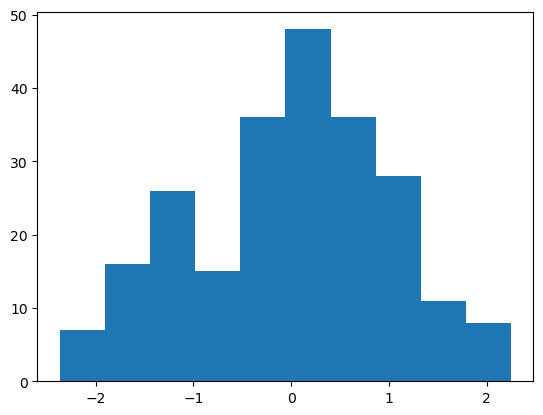

In [62]:
plt.hist(diff)

In [ ]:
#doesnt' appear to follow a normal distribution, let's do some other tests to confirm


<function matplotlib.pyplot.show(close=None, block=None)>

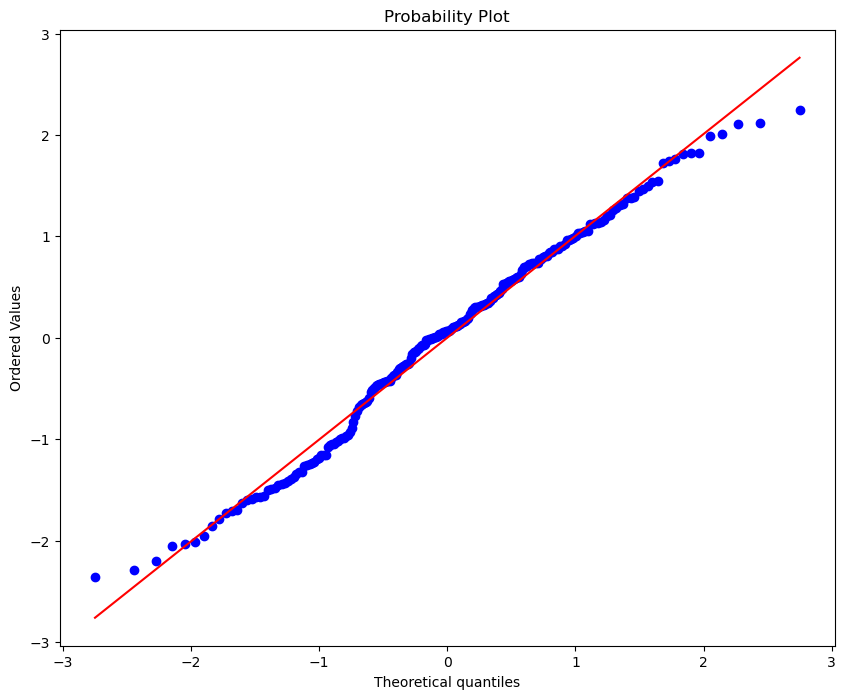

In [64]:
plt.figure(figsize=(10,8))
stats.probplot(diff, plot=plt, dist='norm')
plt.show

In [ ]:
#The plot compares the quantiles of the data to the corresponding quantiles of a theoretical normal distribution. 
#If the data is approximately normally distributed, the points on the plot should follow a straight line.

In [ ]:
#Now we will use the shapiro wilk test for normality, 
#if the test statistic is not significant, then population is normally distributed.

In [65]:
stats.shapiro(diff) #null hypothesis assumes normally distributed data

ShapiroResult(statistic=0.987182080745697, pvalue=0.03639252483844757)

In [ ]:
#since p-value is 0.03, less than 0.05 we can reject the null hypothesis

In [66]:
stats.ttest_ind(sample_01['cnt'], sample_02['cnt']) #performing independent t-test

Ttest_indResult(statistic=1.4830359517896008, pvalue=0.1387496418260078)

In [ ]:
#since p-value is almost 13% we can recject the alternative hypothesis and  accept the null hypothesis; the null-hypothesis says 
#there is no difference in the means of these groups

In [ ]:
# Hence we can conclude that whether its a working day or not has no effect on the bike share.

In [69]:
descriptives, results= rp.ttest(sample_01['cnt'], sample_02['cnt'])

C:\Users\Rukmani\anaconda3\lib\site-packages\researchpy\ttest.py:38: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  groups = group1.append(group2, ignore_index= True)


In [70]:
descriptives

,Variable,N,Mean,SD,SE,95% Conf.,Interval
0,cnt,231.0,4601.584416,1877.715587,123.544615,4358.160535,4845.008297
1,cnt,231.0,4330.168831,2052.141245,135.020981,4064.132702,4596.204960
2,combined,462.0,4465.876623,1969.419880,91.625705,4285.820823,4645.932424


In [71]:
results

,Independent t-test,results
0,Difference (cnt - cnt) =,271.4156
1,Degrees of freedom =,460.0000
2,t =,1.4830
3,Two side test p value =,0.1387
4,Difference < 0 p value =,0.9306
5,Difference > 0 p value =,0.0694
6,Cohen's d =,0.1380
7,Hedge's g =,0.1378
8,Glass's delta1 =,0.1445
9,Point-Biserial r =,0.0690


In [72]:
bike_sharing_data.head()

,season,mnth,holiday,workingday,weathersit,temp,cnt
0,1,1,0,0,2,0.344167,985
1,1,1,0,0,2,0.363478,801
2,1,1,0,1,1,0.196364,1349
3,1,1,0,1,1,0.200000,1562
4,1,1,0,1,1,0.226957,1600


In [73]:
#Now let's check if Temp has any effect on bike sharing
#since the temp. data is not categorical, but continuous, we will have to create categories.

<AxesSubplot:>

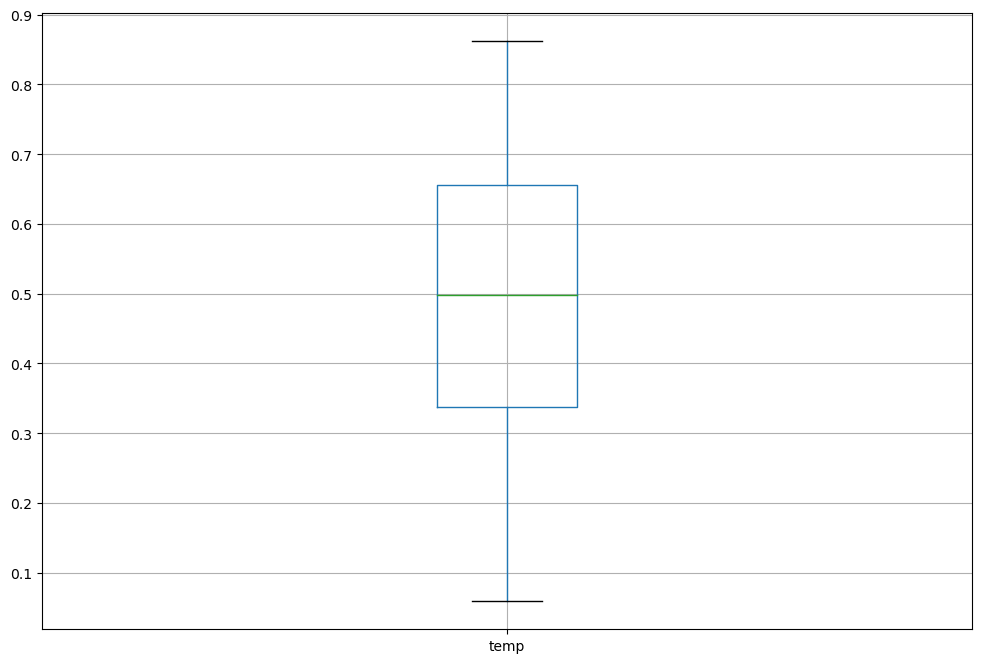

In [74]:
bike_sharing_data[['temp']].boxplot(figsize=(12,8))

In [76]:
bike_sharing_data['temp_category']= bike_sharing_data['temp']>bike_sharing_data['temp'].mean()
#creates a category where if temp>mean=true ; temp<mean=false

In [78]:
bike_sharing_data.sample(10)

,season,mnth,holiday,workingday,weathersit,temp,cnt,temp_category
45,1,2,0,1,1,0.266087,1815,False
573,3,7,0,1,1,0.781667,6904,True
299,4,10,0,1,2,0.470000,2659,False
61,1,3,0,1,1,0.198333,1685,False
49,1,2,0,0,1,0.399167,1635,False
195,3,7,0,1,1,0.663333,5538,True
178,3,6,0,1,1,0.744167,4648,True
33,1,2,0,1,1,0.186957,1550,False
496,2,5,0,1,1,0.533333,7030,True
414,1,2,0,0,2,0.280000,2689,False


In [80]:
bike_sharing_data.groupby('temp_category')['cnt'].describe()

,count,mean,std,min,25%,50%,75%,max
temp_category,,,,,,,,
False,364.0,3387.664835,1691.340133,22.0,1964.5,3301.0,4513.5,8090.0
True,367.0,5611.904632,1475.698228,1115.0,4548.5,5336.0,6897.5,8714.0


<AxesSubplot:title={'center':'cnt'}, xlabel='temp_category'>

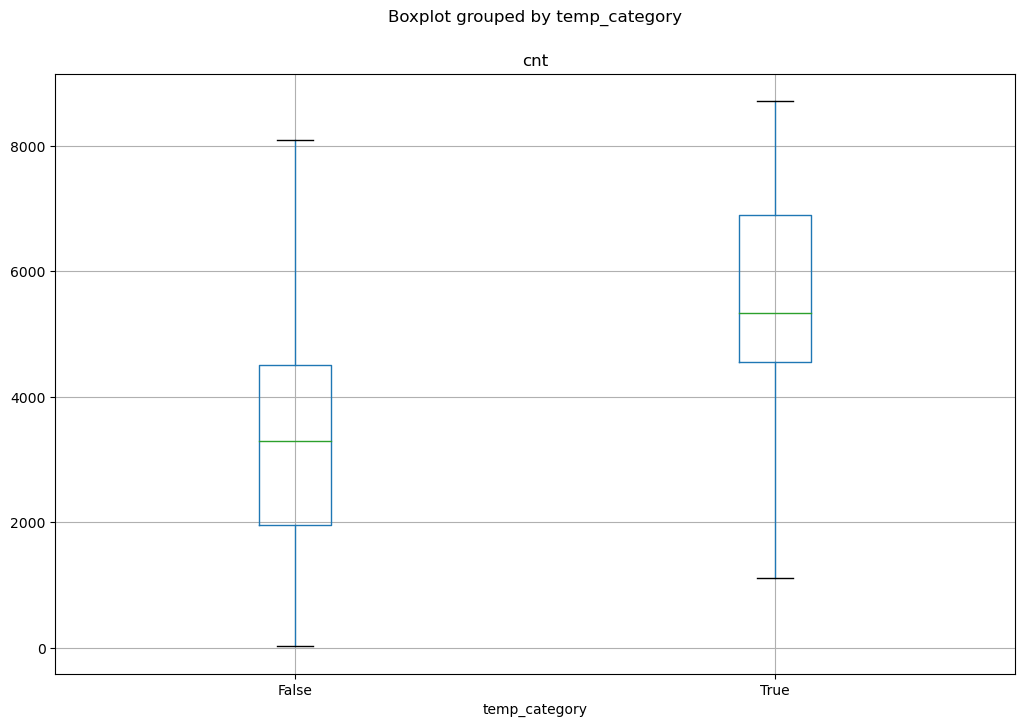

In [81]:
bike_sharing_data.boxplot(column=['cnt'], by='temp_category', figsize=(12,8))

In [85]:
#let's find if the difference in means is significant
samp_01= bike_sharing_data[(bike_sharing_data['temp_category']==True)]
samp_02= bike_sharing_data[(bike_sharing_data['temp_category']==False)]

In [87]:
samp_01.shape, samp_02.shape

((367, 8), (364, 8))

In [89]:
samp_01=samp_01.sample(364)
samp_01.shape, samp_02.shape

((364, 8), (364, 8))

In [90]:
#let's test if there is significant difference bw variances
stats.levene(samp_01['cnt'], samp_02['cnt'])

LeveneResult(statistic=4.582168993937993, pvalue=0.03263879634551874)

In [91]:
#p value 3%, this means the levenes test is significant, we have to reject the null hypothesis, and accept alternative i.e. 
#variances bw these two samples are different

(array([ 1.,  8., 20., 37., 64., 83., 69., 44., 29.,  9.]),
 array([-3.12528588, -2.56995883, -2.01463178, -1.45930473, -0.90397768,
        -0.34865063,  0.20667642,  0.76200347,  1.31733052,  1.87265757,
         2.42798462]),
 <BarContainer object of 10 artists>)

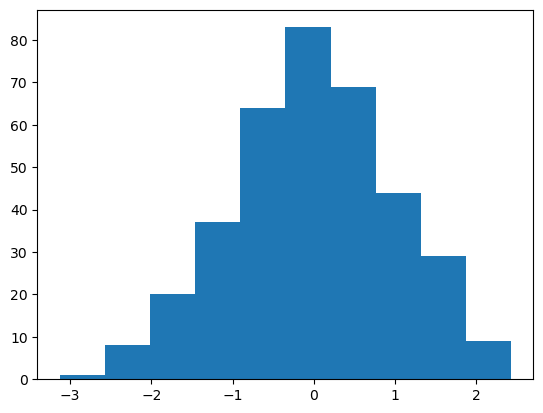

In [93]:
#let's check difference bw the residuals 
diff= scale(np.array(samp_01['cnt'])-np.array(samp_02['cnt']))
plt.hist(diff)

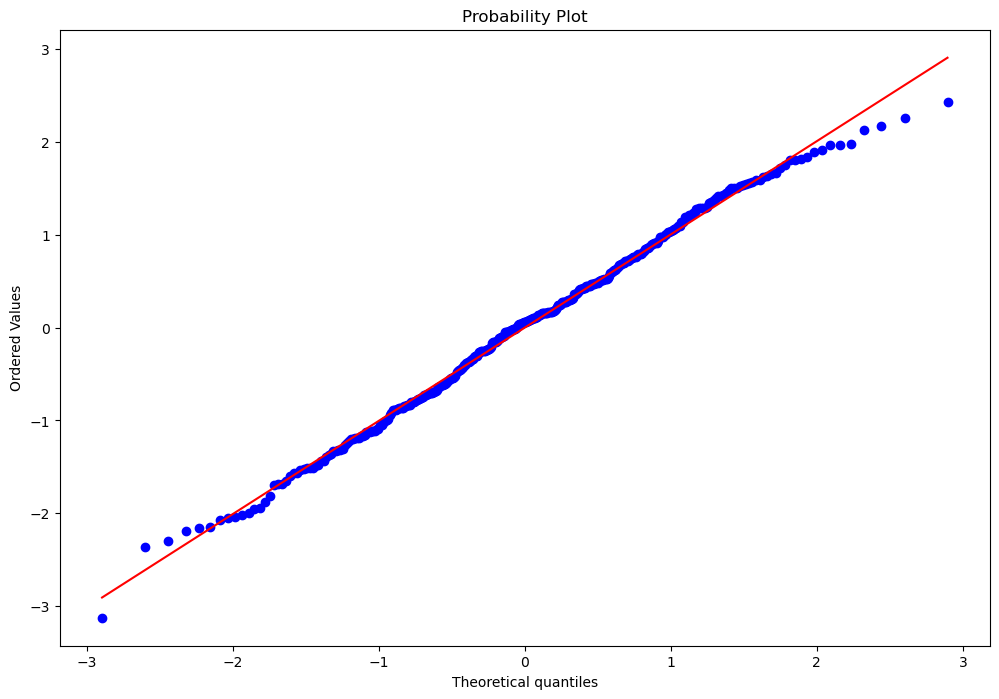

In [94]:
#better technique to use for normal distribution is to check probability plot or the q plt
plt.figure(figsize=(12,8))
stats.probplot(diff, plot=plt)
plt.show()

In [96]:
#shapiro test to test for normality
stats.shapiro(diff)

ShapiroResult(statistic=0.9951744675636292, pvalue=0.3180670142173767)

In [ ]:
# null hypothesis= data is normally distributed 

#However, it is important to keep in mind that the 
#Shapiro-Wilk test can be sensitive to sample size, and a large enough sample size can lead 
#to a significant result even when the deviation from normality is small. 

In [ ]:
#accept the null hypothesis

In [97]:
#perform the independent t-test
stats.ttest_ind(samp_01['cnt'], samp_02['cnt'])

Ttest_indResult(statistic=18.99153046953296, pvalue=1.3334064458544933e-65)

In [98]:
#The null hypothesis for a t-test is that there is no significant difference between the means of two groups. 
#p-value is very small # reject the null hypothesis
#Hence the mean count for different temp are significantly different


In [99]:
descriptives, results= rp.ttest(samp_01 ['cnt'], samp_02['cnt'], equal_variances=False)

C:\Users\Rukmani\anaconda3\lib\site-packages\researchpy\ttest.py:38: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  groups = group1.append(group2, ignore_index= True)


In [100]:
#The equal_variances=False argument specifies that the test should not assume equal variances between the two groups. 
#If the variances are not equal, this is referred to as a Welch's t-test, which adjusts the degrees of freedom 
#for the t-test to account for the difference in variances.

In [101]:
#The code rp.ttest(samp_01['cnt'], samp_02['cnt'], equal_variances=False)
#performs a two-sample t-test using the pingouin Python library.

In [103]:
descriptives

,Variable,N,Mean,SD,SE,95% Conf.,Interval
0,cnt,364.0,5622.648352,1476.659799,77.398004,5470.443580,5774.853124
1,cnt,364.0,3387.664835,1691.340133,88.650311,3213.332169,3561.997501
2,combined,728.0,4505.156593,1941.034844,71.939538,4363.922560,4646.390626


In [104]:
print(results)

        Satterthwaite t-test    results
0  Difference (cnt - cnt) =   2234.9835
1      Degrees of freedom =    713.0223
2                       t =     18.9915
3   Two side test p value =      0.0000
4  Difference < 0 p value =      1.0000
5  Difference > 0 p value =      0.0000
6               Cohen's d =      1.4077
7               Hedge's g =      1.4063
8          Glass's delta1 =      1.5135
9        Point-Biserial r =      0.5796


In [ ]:
#a significant T-value proves that whether it's a hot day or a cold day has a significant difference on number of bikes rented